![LogoUC3M](https://www.fundacion.uc3m.es/wp-content/uploads/2018/11/Logo-UC3M-nuevo.png)

### Aprendizaje Automático · Grado en Ingeniería Informática · Curso 2022/23
# Tutorial 0: Introducción a Numpy

The first step when using Numpy is to load the library. This is often done in this way:

In [1]:
import numpy as np

You can omit this code, which is only used for visualization purposes.

In [12]:
!pip install dask

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [13]:
from dask.array import svg
from IPython.display import HTML

def numpy_to_svg(array):
    return HTML(svg.svg(tuple((tuple(np.ones(x)) for x in array.shape))))

# 1. Creating Numpy arrays

Python has many different types of data "containers": lists, dictionaries, tuples etc. However none of them allows for efficient numerical calculation, in particular not in multi-dimensional cases (think e.g. of operations on images). 

Numpy has been developed exactly to fill this gap. It provides a new data structure, the **numpy array**, and a large library of operations that allow to: 
- generate such arrays
- combine arrays in different ways (concatenation, stacking etc.)
- modify such arrays (projection, extraction of sub-arrays etc.)
- apply mathematical operations on them

Numpy is the base of almost the entire Python scientific programming stack. Many libraries build on top of Numpy, either by providing specialized functions to operate on them (e.g. scikit-image for image processing) or by creating more complex data containers on top of it. The data science library Pandas that will also be presented in this course is a good example of this with its dataframe structures.

## 1.1 What is an array ?

Let us create the simplest example of an array by transforming a regular Python list into an array (we will see more advanced ways of creating arrays in the next chapters):

In [14]:
mylist = [2,5,3,9,5,2]

In [15]:
mylist

[2, 5, 3, 9, 5, 2]

In [16]:
myarray = np.array(mylist)

In [17]:
myarray

array([2, 5, 3, 9, 5, 2])

In [18]:
type(myarray)

numpy.ndarray

We see that ```myarray``` is a Numpy array thanks to the ```array``` specification in the output. The type also says that we have a Numpy ndarray (n-dimensional). At this point we don't see a big difference with regular lists, but we'll see in the following sections all the operations we can do with these objects.

We can already see a difference with two basic attributes of arrays: their type and shape.

### 1.1.1 Array type

Just like when we create regular variables in Python, arrays receive a type when created. Unlike regular list, **all** elements of an array always have the same type. The type of an array can be recovered through the ```.dtype``` method:

In [19]:
myarray.dtype

dtype('int64')

Depending on the content of the list, the array will have different types. But the logic of "maximal complexity" is kept. For example if we mix integers and floats, we get a float array:

In [20]:
myarray2 = np.array([1.2, 6, 7.6, 5])
myarray2

array([1.2, 6. , 7.6, 5. ])

In [21]:
myarray2.dtype

dtype('float64')

In general, we have the possibility to assign a type to an array. This is true here, as well as later when we'll create more complex arrays, and is done via the ```dtype``` option: 

In [22]:
myarray2 = np.array([1.2, 6, 7.6, 500], dtype=np.uint8)
myarray2

/var/folders/f0/tchddh3d1792rbf3s4rssvqh0000gn/T/ipykernel_48929/3658552587.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 500 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  myarray2 = np.array([1.2, 6, 7.6, 500], dtype=np.uint8)


array([  1,   6,   7, 244], dtype=uint8)

The type of the array can also be changed after creation using the ```.astype()``` method:

In [23]:
myfloat_array = np.array([1.2, 6, 7.6, 500], dtype=float)
myfloat_array.dtype

dtype('float64')

In [24]:
myint_array = myfloat_array.astype(np.int8)
myint_array.dtype

dtype('int8')

### 1.1.2 Array shape

A very important property of an array is its **shape** or in other words the dimensions of each axis. That property can be accessed via the ```.shape``` property:

In [25]:
myarray

array([2, 5, 3, 9, 5, 2])

In [26]:
myarray.shape

(6,)

We see that our simple array has only one dimension of length 6. Now of course we can create more complex arrays. Let's create for example a *list of two lists*:

In [27]:
my2d_list = [[1,2,3], [4,5,6]]

my2d_array = np.array(my2d_list)
my2d_array

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
my2d_array.shape

(2, 3)

We see now that the shape of this array is *two-dimensional*. We also see that we have 2 lists of 3 elements. In fact at this point we should forget that we have a list of lists and simply consider this object as a *matrix* with *two rows and three columns*. We'll use the follwing graphical representation to clarify some concepts:

In [29]:
numpy_to_svg(my2d_array)

## 1.2 Creating arrays

We have seen that we can turn regular lists into arrays. However this becomes quickly impractical for larger arrays. Numpy offers several functions to create particular arrays. 

### 1.2.1 Common simple arrays
For example an array full of zeros or ones:

In [32]:
one_array = np.zeros((2,3))
one_array

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
zero_array = np.ones((2,3))
zero_array

array([[1., 1., 1.],
       [1., 1., 1.]])

One can also create diagonal matrix:

In [34]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

By default Numpy creates float arrays:

In [35]:
one_array.dtype

dtype('float64')

However as mentioned before, one can impose a type usine the ```dtype``` option:

In [36]:
one_array_int = np.ones((2,3), dtype=np.int8)
one_array_int

array([[1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [37]:
one_array_int.dtype

dtype('int8')

### 1.2.2 Copying the shape
Often one needs to create arrays of same shape. This can be done with "like-functions":

In [38]:
same_shape_array = np.zeros_like(one_array)
same_shape_array

array([[0., 0., 0.],
       [0., 0., 0.]])

In [39]:
one_array.shape

(2, 3)

In [40]:
same_shape_array.shape

(2, 3)

In [41]:
np.ones_like(one_array)

array([[1., 1., 1.],
       [1., 1., 1.]])

### 1.2.3 Complex arrays

We are not limited to create arrays containing ones or zeros. Very common operations involve e.g. the creation of arrays containing regularly arrange numbers. For example a "from-to-by-step" list:

In [42]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

Or equidistant numbers between boundaries:

In [44]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

Numpy offers in particular a ```random``` submodules that allows one to create arrays containing values from a wide array of distributions. For example, normally distributed:

In [48]:
normal_array = np.random.normal(loc=10, scale=2, size=(3,4))
normal_array

array([[ 8.94062391, 12.83097099, 11.37039723,  7.9233687 ],
       [10.11807325, 11.3891575 , 10.00784335,  7.91547838],
       [ 8.85865111,  7.26542215,  6.37035918, 10.37620045]])

In [46]:
np.random.poisson(lam=5, size=(3,4))

array([[4, 6, 6, 6],
       [4, 6, 7, 7],
       [6, 2, 7, 2]])

### 1.2.4 Higher dimensions

Until now we have almost only dealt with 1D or 2D arrays that look like a simple grid:

In [49]:
myarray = np.ones((5,10))
numpy_to_svg(myarray)

We are not limited to create 1 or 2 dimensional arrays. We can basically create any-dimension array. For example in microscopy, images can be volumetric and thus they are 3D arrays in Numpy. For example if we acquired 5 planes of a 10px by 10px image, we would have something like:

In [50]:
array3D = np.ones((10,10,5))

In [51]:
numpy_to_svg(array3D)

All the functions and properties that we have seen until now are N-dimensional, i.e. they work in the same way irrespective of the array size.

## 1.3 Importing arrays

We have seen until now multiple ways to create arrays. However, most of the time, you will *import* data from some source, either directly as arrays or as lists, and use these data in your analysis.

### 1.3.1 Loading and saving arrays

Numpy can efficiently save and load arrays in its own format ```.npy```. Let's create an array and save it:

In [52]:
array_to_save = np.random.normal(10, 2, (4,5))
array_to_save

array([[10.37099372,  7.75439882,  9.26923804, 13.33295345,  8.81585003],
       [ 7.87125268, 11.09121278,  6.75657999,  4.56228792, 10.93989381],
       [12.50663504,  9.56717361,  7.71868569, 10.23208586, 10.60312301],
       [ 8.83457924, 11.02381275,  7.41998686,  9.0808525 , 10.46255038]])

In [53]:
np.save('my_saved_array.npy', array_to_save)

In [55]:
!ls

T0 Introduction to Pandas.ipynb       T4 feature_selection.ipynb
T0_IntroNumpy.ipynb                   final_tree.joblib
T1 TreeEvaluation_v1.ipynb            my_saved_array.npy
T2 decisionTreesHyperparameters.ipynb tennis.txt
T3 SVMHyperparameters.ipynb


Now that this array is saved on disk, we can load it again using ```np.load```:

In [56]:
new_array = np.load('my_saved_array.npy')
new_array

array([[10.37099372,  7.75439882,  9.26923804, 13.33295345,  8.81585003],
       [ 7.87125268, 11.09121278,  6.75657999,  4.56228792, 10.93989381],
       [12.50663504,  9.56717361,  7.71868569, 10.23208586, 10.60312301],
       [ 8.83457924, 11.02381275,  7.41998686,  9.0808525 , 10.46255038]])

If you have several arrays that belong together, you can also save them in a single file using ```np.savez``` in ```npz``` format. Let's create a second array:

In [57]:
array_to_save2 = np.random.normal(10, 2, (1,2))
array_to_save2

array([[10.78420595, 10.01411727]])

In [58]:
np.savez('multiple_arrays.npz', array_to_save=array_to_save, array_to_save2=array_to_save2)

In [59]:
!ls

T0 Introduction to Pandas.ipynb       T4 feature_selection.ipynb
T0_IntroNumpy.ipynb                   final_tree.joblib
T1 TreeEvaluation_v1.ipynb            multiple_arrays.npz
T2 decisionTreesHyperparameters.ipynb my_saved_array.npy
T3 SVMHyperparameters.ipynb           tennis.txt


And when we load it again:

In [60]:
load_multiple = np.load('multiple_arrays.npz')
type(load_multiple)

numpy.lib.npyio.NpzFile

We get here an ```NpzFile``` *object* from which we can read our data. Note that when we load an ```npz``` file, it is only loaded *lazily*, i.e. data are not actually read, but the content is parsed. This is very useful if you need to store large amounts of data but don't always need to re-load all of them. We can use methods to actually access the data:

In [61]:
load_multiple.files

['array_to_save', 'array_to_save2']

In [62]:
load_multiple.get('array_to_save2')

array([[10.78420595, 10.01411727]])

### 1.3.2 Importing data as arrays

Images are a typical example of data that are array-like (matrix of pixels) and that can be imported directly as arrays. Of course, each domain will have it's own *importing libraries*. For example in the area of imaging, the scikit-image package is one of the main libraries, and it offers and importer of images as arrays which works both with local files and web addresses:

In [66]:
import skimage.io

image = skimage.io.imread('https://upload.wikimedia.org/wikipedia/commons/f/fd/%27%C3%9Cbermut_Exub%C3%A9rance%27_by_Paul_Klee%2C_1939.jpg')

We can briefly explore that image:

In [67]:
type(image)

numpy.ndarray

In [68]:
image.dtype

dtype('uint8')

In [69]:
image.shape

(584, 756, 3)

We see that we have an array of integeres with 3 dimensions. Since we imported a jpg image, we know that the thrid dimension corresponds to three color channels Red, Green, Blue (RGB).

You can also read regular CSV files directly as Numpy arrays. This is more commonly done using Pandas, so we don't spend much time on this, but here is an example on importing data from the web:

In [71]:
oilprice = np.loadtxt('https://raw.githubusercontent.com/guiwitz/Rdatasets/master/csv/quantreg/gasprice.csv',
                      delimiter=',', usecols=range(2,3), skiprows=1)

In [72]:
oilprice

array([126.6, 127.2, 132.1, 133.3, 133.9, 134.5, 133.9, 133.4, 132.8,
       132.3, 131.1, 134.1, 119.2, 116.8, 113.9, 110.6, 107.8, 105.4,
       102.5, 104.5, 104.3, 104.7, 105.2, 106.6, 106.9, 109. , 110.4,
       111.3, 112.1, 112.9, 114. , 113.8, 113.5, 112.6, 111.4, 110.4,
       109.8, 109.4, 109.1, 109.1, 109.9, 111.2, 112.4, 112.4, 112.7,
       112. , 111. , 109.7, 109.2, 108.9, 108.4, 108.8, 109.1, 109.1,
       110.2, 110.4, 109.9, 109.9, 109.1, 107.5, 106.3, 105.3, 104.2,
       102.6, 101.4, 100.6,  99.5, 100.4, 101.1, 101.4, 101.2, 101.3,
       101. , 101.5, 101.3, 102.6, 105.1, 105.8, 107.2, 108.9, 110.2,
       111.8, 112. , 112.8, 114.3, 115.1, 115.3, 114.9, 114.7, 113.9,
       113.2, 112.8, 112.6, 112.3, 111.6, 112.3, 112.1, 112.1, 112.4,
       112.3, 111.8, 111.5, 111.5, 111.3, 111.3, 112. , 112. , 111.2,
       110.6, 109.8, 108.9, 107.8, 107.4, 106.9, 106.5, 106.6, 106.1,
       105.5, 105.5, 106.2, 105.3, 104.7, 104.2, 104.8, 105.8, 105.6,
       105.7, 106.8,

# 2. Mathematics with arrays

One of the great advantages of Numpy arrays is that they allow one to very easily apply mathematical operations to entire arrays effortlessly. We are presenting here 3 ways in which this can be done.

In [73]:
import numpy as np

## 2.1 Simple calculus

To illustrate how arrays are useful, let's first consider the following problem. You have a list:

In [74]:
mylist = [1,2,3,4,5]

And now you wish to add to each element of that list the value 3. If we write:

In [75]:
mylist + 3

TypeError: can only concatenate list (not "int") to list

We receive an error because Python doesn't know how to combine a list with a simple integer. In this case we would have to use a for loop or a comprehension list, which is cumbersome.

In [76]:
[x + 3 for x in mylist]

[4, 5, 6, 7, 8]

Let's see now how this works for an array:

In [77]:
myarray = np.array(mylist)

In [78]:
myarray + 3

array([4, 5, 6, 7, 8])

Numpy understands without trouble that our goal is to add the value 3 to *each element* in our list. Naturally this is dimension independent e.g.:

In [79]:
my2d_array = np.ones((3,6))
my2d_array

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [80]:
my2d_array + 3

array([[4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4.]])

Of course as long as we don't reassign this new state to our variable it remains unchanged:

In [81]:
my2d_array

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

We have to write:

In [82]:
my2d_array = my2d_array + 3

In [83]:
my2d_array

array([[4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4.]])

Naturally all basic operations work:

In [84]:
my2d_array * 4

array([[16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16.]])

In [85]:
my2d_array / 5

array([[0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8]])

In [86]:
my2d_array ** 5

array([[1024., 1024., 1024., 1024., 1024., 1024.],
       [1024., 1024., 1024., 1024., 1024., 1024.],
       [1024., 1024., 1024., 1024., 1024., 1024.]])

## 2.2 Mathematical functions

In addition to simple arithmetic, Numpy offers a vast choice of functions that can be directly applied to arrays. For example trigonometry:

In [87]:
np.cos(myarray)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362,  0.28366219])

Exponentials and logs:

In [88]:
np.exp(myarray)

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

In [89]:
np.log10(myarray)

array([0.        , 0.30103   , 0.47712125, 0.60205999, 0.69897   ])

## 2.3 Logical operations

If we use a logical comparison on a regular variable, the output is a *boolean* (True or False) that describes the outcome of the comparison:

In [90]:
a = 3
b = 2
a > 3

False

We can do exactly the same thing with arrays. When we added 3 to an array, that value was automatically added to each element of the array. With logical operations, the comparison is also done for each element in the array resulting in a boolean array:

In [91]:
myarray = np.zeros((4,4))
myarray[2,3] = 1
myarray

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [92]:
myarray > 0

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False]])

Exactly as for simple variables, we can assign this boolean array to a new variable directly:

In [93]:
myboolean = myarray > 0

In [94]:
myboolean

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False]])

## 2.4 Methods modifying array dimensions

The operations described above were applied *element-wise*. However sometimes we need to do operations either at the array level or some of its axes. For example, we need very common statistics on an array (mean, sum etc.)

In [95]:
nd_array = np.random.normal(10, 2, (3,4))
nd_array

array([[10.06776347,  6.53862575, 12.12481402,  8.97257523],
       [12.96069021, 12.42428851, 13.07012182, 11.76369144],
       [ 3.87278107,  7.82438656,  9.72693683, 12.80228176]])

In [96]:
np.mean(nd_array)

10.179079720945127

In [97]:
np.std(nd_array)

2.807042843267897

Or the maximum value:

In [98]:
np.max(nd_array)

13.070121817511941

Note that several of these functions can be called as array methods instead of numpy functions:

In [99]:
nd_array.mean()

10.179079720945127

In [100]:
nd_array.max()

13.070121817511941

Note that most functions can be applied to specific axes. Let's remember that our arrays is:

In [101]:
nd_array

array([[10.06776347,  6.53862575, 12.12481402,  8.97257523],
       [12.96069021, 12.42428851, 13.07012182, 11.76369144],
       [ 3.87278107,  7.82438656,  9.72693683, 12.80228176]])

We can for example do a maximum projection along the first axis (rows): the maximum value of each column is kept:

In [103]:
proj0 = nd_array.max(axis=0)
proj0

array([12.96069021, 12.42428851, 13.07012182, 12.80228176])

In [104]:
proj0.shape

(4,)

We can of course do the same operation for the second axis:

In [105]:
proj1 = nd_array.max(axis=1)
proj1

array([12.12481402, 13.07012182, 12.80228176])

In [106]:
proj1.shape

(3,)

There are of course more advanced functions. For example a cumulative sum:

In [107]:
np.cumsum(nd_array)

array([ 10.06776347,  16.60638922,  28.73120324,  37.70377847,
        50.66446868,  63.08875719,  76.15887901,  87.92257044,
        91.79535151,  99.61973807, 109.34667489, 122.14895665])

# 3. Plotting arrays

Arrays can represent any type of numeric data, typical examples being e.g. time-series (1D), images (2D) etc. Very often it is helpful to visualize such arrays either while developing an analysis pipeline or as an end-result. We show here briefly how this visualization can be done using the Matplotlib library. That library has extensive capabilities and we present here a minimal set of examples to help you getting started. Note that we will see other libraries when exploring Pandas in the next chapters that are more specifically dedicated to data science.

All the necessary plotting functions reside in the ```pyplot``` module of Matplotlib. ```plt``` contains for example all the functions for various plot types:
- plot an image: ```plt.imshow()```
- line plot: ```plt.plot```
- plot a histogram: ```plt.hist()```
- etc.

Let's import it with it's standard abbreviation ```plt``` (as well as numpy):

In [108]:
import matplotlib.pyplot as plt
import numpy as np

## 3.1 Data

We will use here Numpy to generate synthetic data to demonstrate plotting. We create an array for time, and then transform that array with a sine function. Finally we make a second version where we add some noise to the data:

In [109]:
# time array 
time = np.arange(0,20,0.5)

# sine function
time_series = np.sin(time)

# sine function plus noise
time_series_noisy = time_series + np.random.normal(0,0.5,len(time_series))

## 3.2 General concepts

We are going to see in the next sections a few example of important plots and how to customize them. However we start here by explaining here the basic concept of Matplotlib using a simple line plot (see next section for details on line plot).

### 3.2.1 One-line plot
The simplest way to create a plot, is just to directly call the relevant function, e.g. ```plt.plot()```for a line plot:

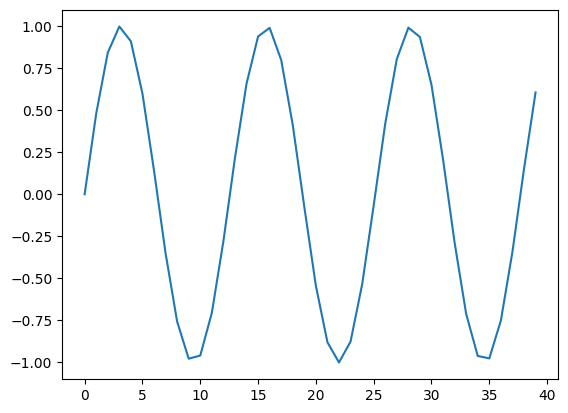

In [112]:
plt.plot(time_series);

If we need to plot multiple datasets one the same plot, we can just keep adding plots on top of each other:

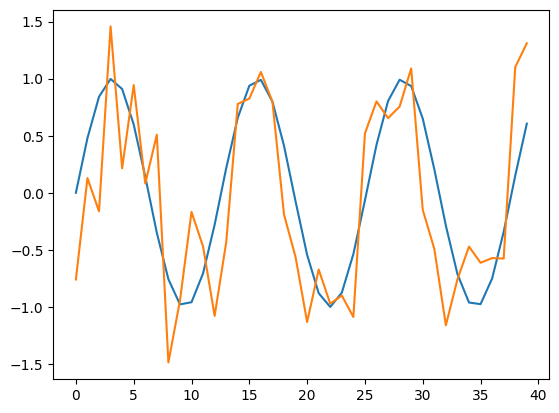

In [113]:
plt.plot(time_series);
plt.plot(time_series_noisy);

As you can see Matplotlib automatically knows that you want to combine different signals, and by default colors them. From here, we can further customize each plot individually, but we are very quickly going to see limits for how to adjust the figure settings. What we really need here is a *handle* for the figure and each plot.

### 3.2.2 Object-based plots

In order to gain more control on the plot, we need to gain control on the elements that constitute it. Those are:
- The ```Figure``` object which contains all elements of the figure
- The ```Axes``` object, the actual plots that belong to a figure object

We can gain this control by explicity creating these objects via the ```subplots()``` function which returns a figure and an axis object:

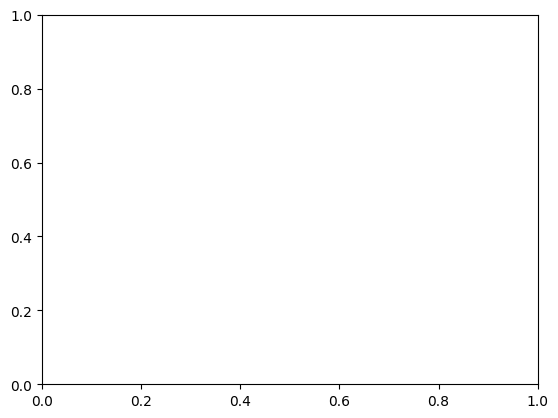

In [114]:
fig, ax = plt.subplots()

We see that we just get an empty figure with axes that we should now fill. For example the ```ax``` object can create an image plot on its own:

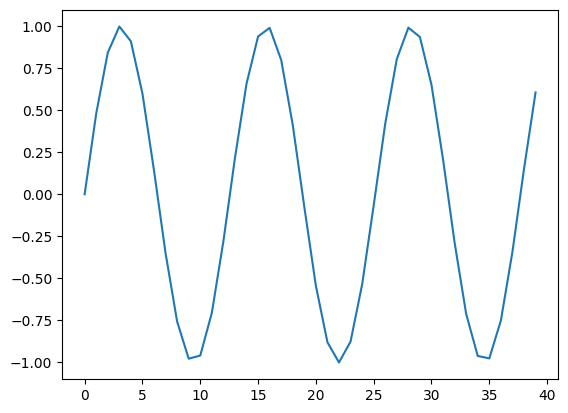

In [115]:
fig, ax = plt.subplots()
ax.plot(time_series);

We can go further and customize other elements of the plot. Again, this is only possible because we have reference to the "plot-objects". For example we can add labels:

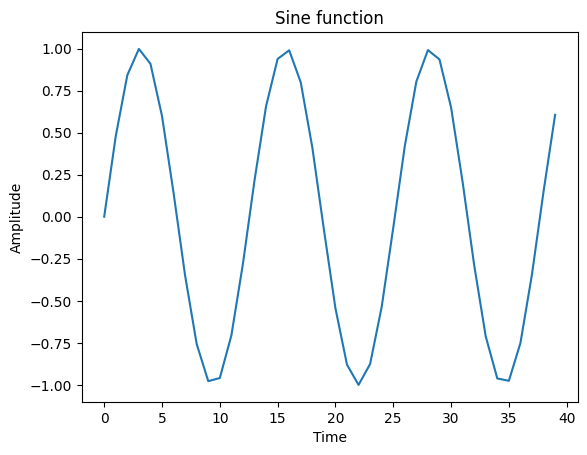

In [116]:
fig, ax = plt.subplots()
plt.plot(time_series);
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude');
ax.set_title('Sine function');

We can also superpose multiple plots. As we want all of them to share the same axis, we use the same ```ax``` reference. For example we can add a line plot:

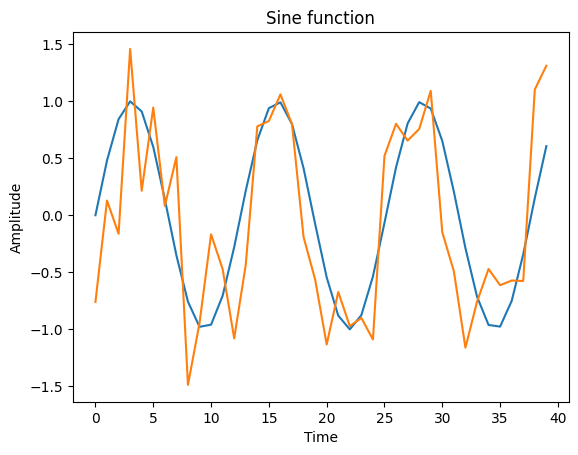

In [117]:
fig, ax = plt.subplots()
ax.plot(time_series);
ax.plot(time_series_noisy);
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude');
ax.set_title('Sine function');

And finally we can export our image as an independent picture using the ```fig``` reference:

In [118]:
fig.savefig('My_first_plot.png')

### 3.2.3 Grids

Using the sort of syntax described above it is very easy to crate complex plots with multiple panels. The simplest solution is to specify a *grid* of plots when creating the figure using ```plt.subplots()```. This provides a list of ```Axes``` objects, each corresponding to one element of the grid:

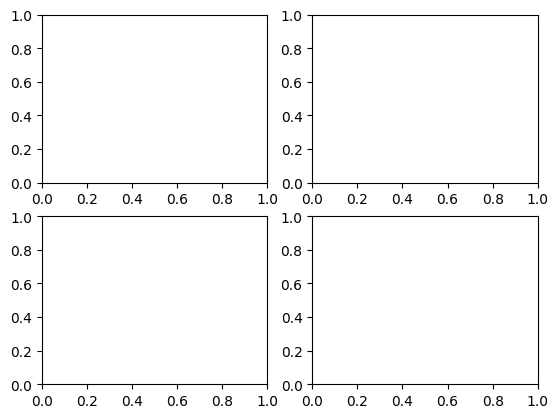

In [119]:
fig, ax = plt.subplots(2,2)

Here ```ax``` is now a 2D numpy array whose elements are ```Axis``` objects:

In [120]:
type(ax)

numpy.ndarray

In [121]:
ax.shape

(2, 2)

We access each element of the ```ax``` array like a regular list and use them to plot:

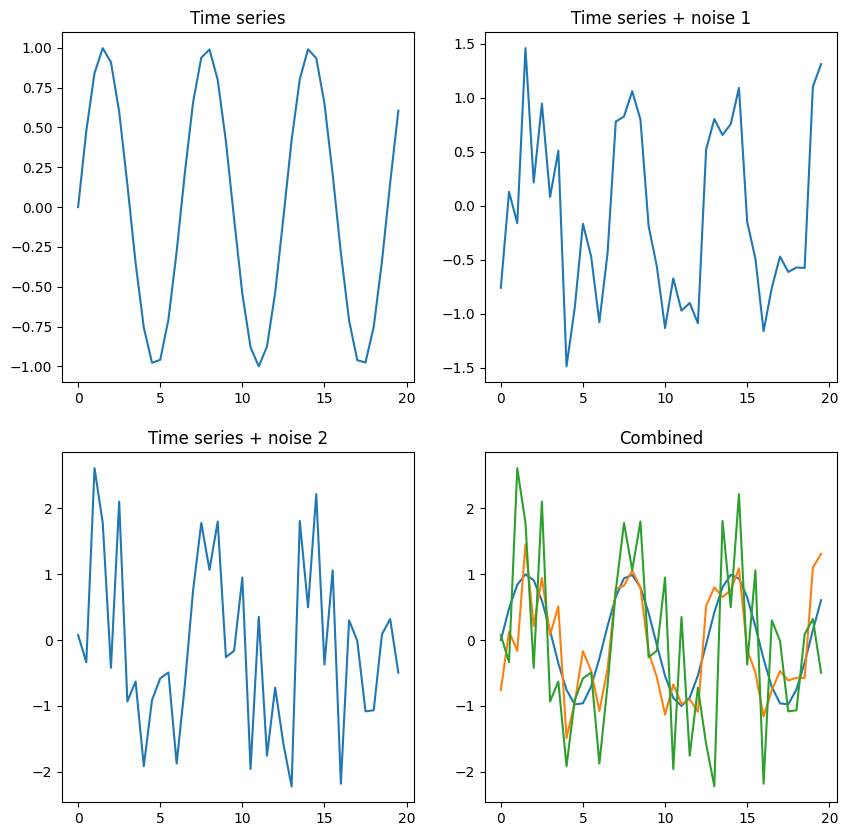

In [122]:
# we create additional data
time_series_noisy2 = time_series + np.random.normal(0,1,len(time_series))# create figure with 2x2 subplots
time_series_noisy3 = time_series + np.random.normal(0,1.5,len(time_series))# create figure with 2x2 subplots

# create the figure and axes
fig, ax = plt.subplots(2,2, figsize=(10,10))

# fill each subplot
ax[0,0].plot(time, time_series);
ax[0,1].plot(time, time_series_noisy);
ax[1,0].plot(time, time_series_noisy2);

# in the last plot, we combined all plots
ax[1,1].plot(time, time_series);
ax[1,1].plot(time, time_series_noisy);
ax[1,1].plot(time, time_series_noisy2);

# we can add titles to subplots
ax[0,0].set_title('Time series')
ax[0,1].set_title('Time series + noise 1')
ax[1,0].set_title('Time series + noise 2')
ax[1,1].set_title('Combined');

An alternative is to use ```add_subplot```. Here we only create a figure, and progressively add new subplots in a pre-determined grid. This variant is useful when programmatically creating a figure, as it easily allows to create plots in a loop:

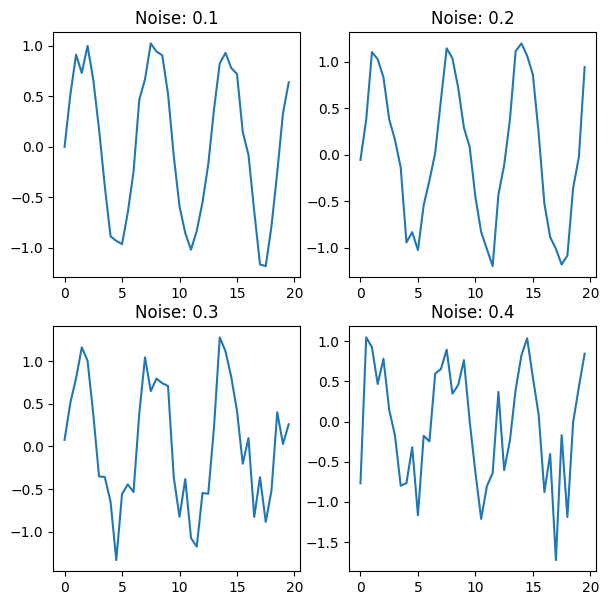

In [123]:
# create a figure
fig = plt.figure(figsize=(7,7))
for x in range(1,5):
    # add subplot and create an axis
    ax = fig.add_subplot(2,2,x)
    # plot the histogram in the axis
    ax.plot(time, time_series + np.random.normal(0,x/10, len(time)))
    # customize axis
    ax.set_title(f'Noise: {x/10}')

## 3.3 Plot types

There is an extensive choice of plot types available in Matplotlib. Here we limit the presentation to the three most common ones: line plot, histogram and image.

### 3.3.1 Line plot

We have already seen line plots above, but we didn't customize the plot itself. A 1D array can simply be plotted by using:

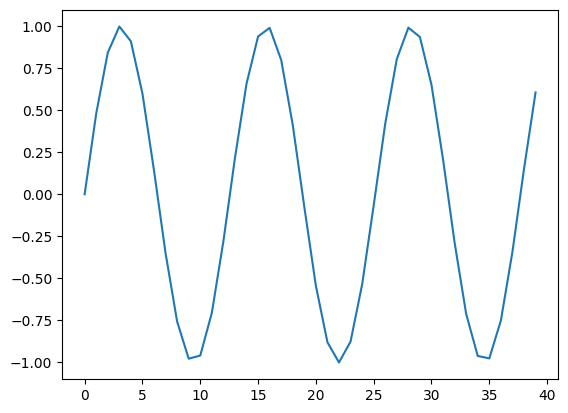

In [124]:
plt.plot(time_series);

This generates by default a line plot where the x-axis simply uses the array index and the array itself is plotted as y-axis. We can explicitly specify the x-axis by passing first x-axis array, here the ```time``` array:

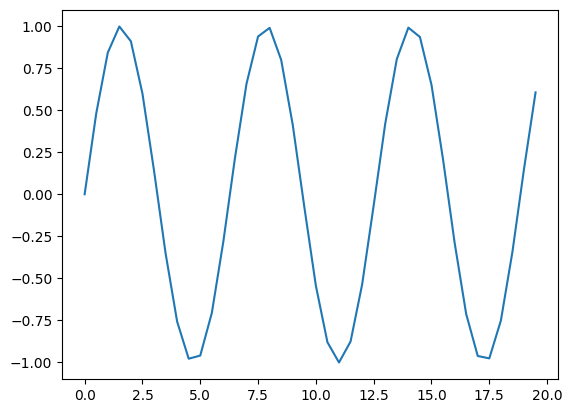

In [125]:
plt.plot(time, time_series);

Each Matplotlib plot can be extensively customized. We only give here a few examples of what can be done. For example, we can change the plot color (for a list of named colors see [here](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)), and add markers (for a list of markers see [here](https://matplotlib.org/3.1.1/api/markers_api.html)):

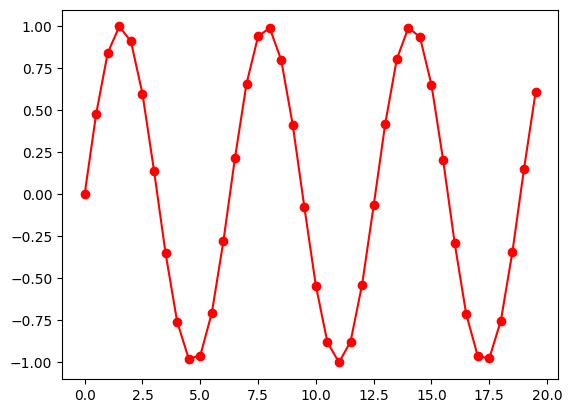

In [126]:
plt.plot(time, time_series, color='red', marker='o');

Conveniently, several of this styling options can be added in a short form. In this example we can specify that we want a line (```-```), markers (```o```) and the color red (```r```) using ```-or```:

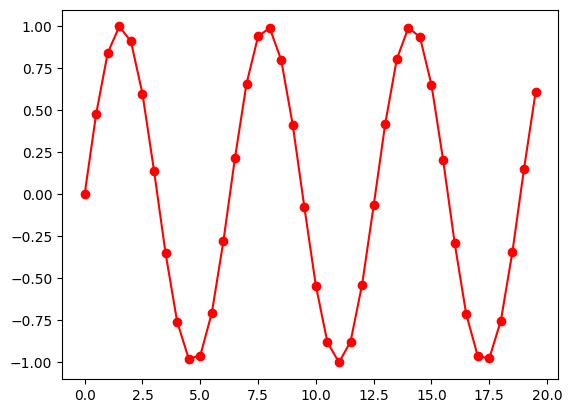

In [127]:
plt.plot(time, time_series, '-or');

Of course if the data are not representing a continuous signal but just a cloud of points, we can skip the line argument to obtain a scatter plot. You can also directly use the ```plt.scatter()``` function:

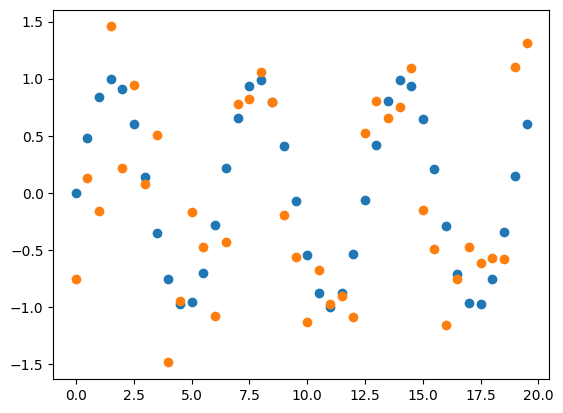

In [128]:
plt.plot(time, time_series, 'o');
plt.plot(time, time_series_noisy, 'o');

### 3.3.2 Histogram

To get an idea of the contents of an array, it is very common to plot a histogram of it. This can be done with the ```plt.hist()``` function:

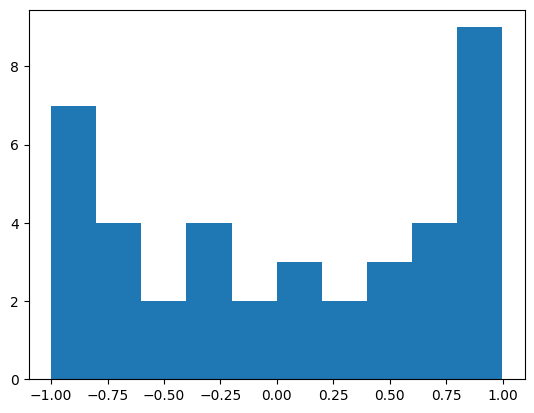

In [129]:
plt.hist(time_series);

Matplotlib selects bins for you, but most of the time you'll want to change those. The simplest is just to specify all bins using ```np.arange()```:

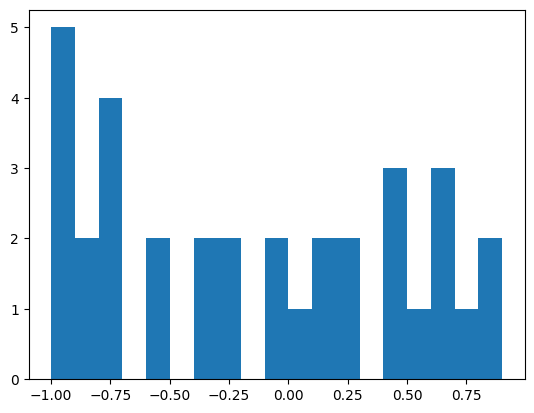

In [130]:
plt.hist(time_series, bins = np.arange(-1,1,0.1));

Just like for line plots, you can superpose histograms. However they will overlap, so you may want to fix the transparency of the additional layers with the ```alpha``` parameter:

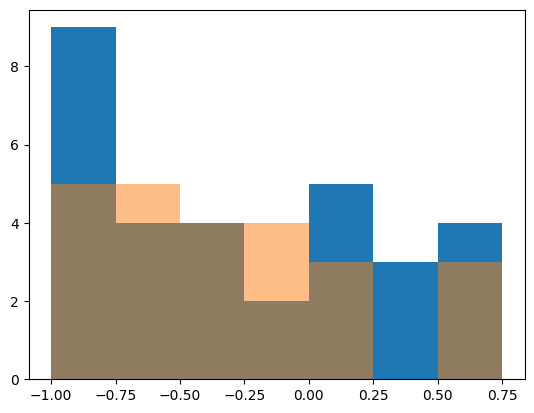

In [131]:
plt.hist(time_series, bins = np.arange(-1,1,0.25));
plt.hist(time_series_noisy, bins = np.arange(-1,1,0.25), alpha = 0.5);

And also as demonstrated before you can adjust the settings of your figure, by creating figure and axis objects:

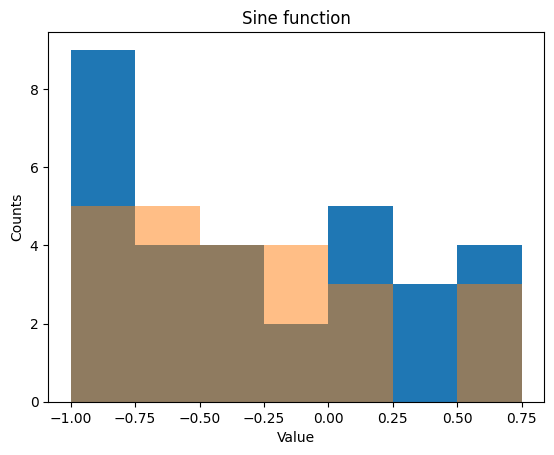

In [132]:
fig, ax = plt.subplots()
ax.hist(time_series, bins = np.arange(-1,1,0.25));
ax.hist(time_series_noisy, bins = np.arange(-1,1,0.25), alpha = 0.5);
ax.set_xlabel('Value')
ax.set_ylabel('Counts');
ax.set_title('Sine function');

### 3.3.4 Image plot

Finally, we often need to look at 2D arrays. These can of course be 2D functions but most of the time they are images. We can again create synthetic data with Numpy. First we create a two 2D grids that contain the x,y indices of each element:

In [133]:
xindices, yindices = np.meshgrid(np.arange(20), np.arange(20))

Then we can crete an array that contains the euclidian distance from a given point $d = ((x-x_0)^2 + (y-y_0)^2)^{1/2}$

In [134]:
centerpoint = [5,8]
dist = ((xindices - centerpoint[0])**2 + (yindices - centerpoint[1])**2)**0.5

If we want to visualize this array, we can then use ```plt.imshow()```:

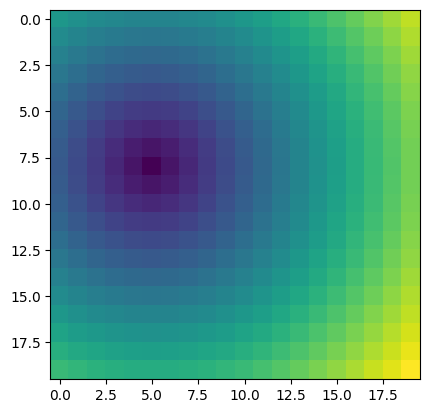

In [135]:
plt.imshow(dist);

Like the other functions ```plt.imshow()``` has numerous options to adjust the image aspect. For example one can change the default colormap, or the aspect ratio of the image:

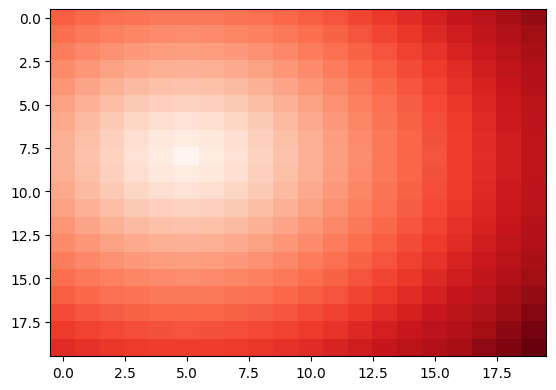

In [136]:
plt.imshow(dist, cmap='Reds', aspect=0.7);

Finally, one can mix different types of plot. We can for example add our line plot from the beginning on top of the image:

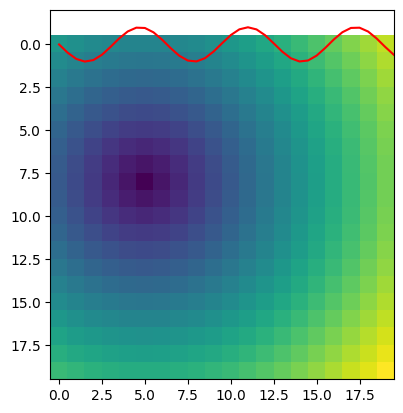

In [137]:
plt.imshow(dist)
plt.plot(time, time_series, color = 'r')

# 4. Indexing, slicing

Each element of an array can be located by its position in each dimension. Numpy offers multiple ways to access single elements or groups of elements in very efficient ways. We will illustrate these concepts both with small simple matrices as well as a regular image, in order to illustrate them.

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
plt.gray();

<Figure size 640x480 with 0 Axes>

We first load an image included in the scikit-image package:

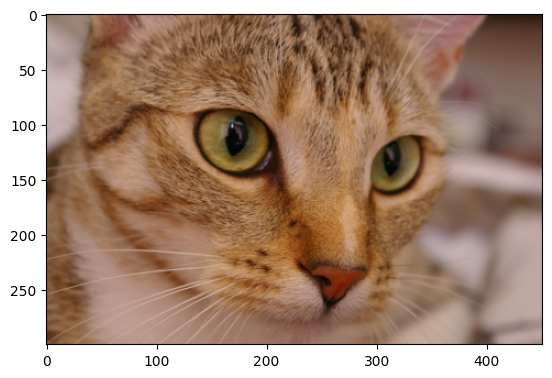

In [140]:
image = skimage.data.chelsea()
plt.imshow(image);

We can check the dimensions of the image and see that it is an RGB image with 3 channels:

In [141]:
image.shape

(300, 451, 3)

## 4.1 Accessing single values

We create a small 2D array to use as an example:

In [142]:
normal_array = np.random.normal(10, 2, (3,4))
normal_array

array([[11.13913435,  8.21368618, 10.39069239, 11.27768184],
       [ 6.89608385, 12.75670282,  6.41298773, 10.80488503],
       [ 8.02096292, 10.92996143,  9.49776646, 12.92692533]])

It is very easy to access an array's values. One can just pass an *index* for each dimensions. For example to recover the value on the last row and second column of the ```normal_array``` array we just write (remember counting starts at 0): 

In [143]:
single_value = normal_array[2,1]
single_value

10.929961425238352

What is returned in that case is a single number that we can re-use:

In [144]:
single_value += 10
single_value

20.929961425238353

And that change doesn't affect the original value in the array:

In [145]:
normal_array

array([[11.13913435,  8.21368618, 10.39069239, 11.27768184],
       [ 6.89608385, 12.75670282,  6.41298773, 10.80488503],
       [ 8.02096292, 10.92996143,  9.49776646, 12.92692533]])

However we can also directly change the value in an array:

In [146]:
normal_array[2,1] = 23

In [147]:
normal_array

array([[11.13913435,  8.21368618, 10.39069239, 11.27768184],
       [ 6.89608385, 12.75670282,  6.41298773, 10.80488503],
       [ 8.02096292, 23.        ,  9.49776646, 12.92692533]])

## 4.2 Accessing part of an array with indices: slicing

### 4.2.1 Selecting a range of elements

One can also select multiple elements in each dimension (e.g. multiple rows and columns in 2D) by using the ```start:end:step``` syntax. By default, if omitted, ```start=0```, ```end=last element``` and ```step=1```. For example to select the first **and** second rows of the first column, we can write:

In [148]:
normal_array[0:2,0]

array([11.13913435,  6.89608385])

Note that the ```end``` element is **not** included. One can use the same notation for all dimensions:

In [149]:
normal_array[0:2,2:4]

array([[10.39069239, 11.27768184],
       [ 6.41298773, 10.80488503]])

In [150]:
normal_array[1:,2:4]

array([[ 6.41298773, 10.80488503],
       [ 9.49776646, 12.92692533]])

### 4.2.2 Selecting all elements
If we only specify ```:```, it means we want to recover all elements in that dimension:

In [151]:
normal_array[:,2:4]

array([[10.39069239, 11.27768184],
       [ 6.41298773, 10.80488503],
       [ 9.49776646, 12.92692533]])

Also in general, if you only specify the value for a single axis, this will take the first element of the first dimension:

In [152]:
normal_array

array([[11.13913435,  8.21368618, 10.39069239, 11.27768184],
       [ 6.89608385, 12.75670282,  6.41298773, 10.80488503],
       [ 8.02096292, 23.        ,  9.49776646, 12.92692533]])

In [153]:
normal_array[1]

array([ 6.89608385, 12.75670282,  6.41298773, 10.80488503])

Finally note that if you want to recover only one element along a dimension (single row, column etc), you can do that in two ways:

In [154]:
normal_array[0,:]

array([11.13913435,  8.21368618, 10.39069239, 11.27768184])

This returns a one-dimensional array containing a single row from the original array:

In [155]:
normal_array[0,:].shape

(4,)

Instead, if you specify actual boundaries that still return only a single row:

In [156]:
normal_array[0:1,:]

array([[11.13913435,  8.21368618, 10.39069239, 11.27768184]])

In [157]:
normal_array[0:1,:].shape

(1, 4)

you recover a tow dimensional array where one of the dimensions has a size of 1.

### 4.2.3 Illustration on an image

We can for example only select half the rows of the image but all columns and channels:

In [158]:
image.shape

(300, 451, 3)

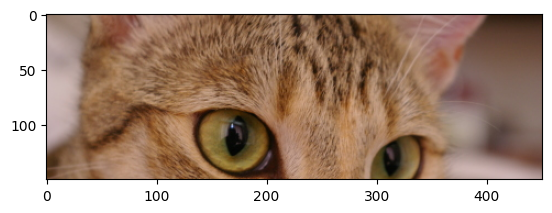

In [159]:
sub_image = image[0:150,:,:]
plt.imshow(sub_image);

Or we can take every fith column and row from a single channel, which returns a pixelated version of the original image:

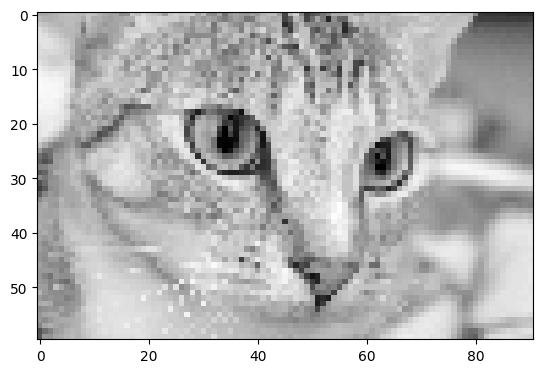

In [160]:
plt.imshow(image[::5,::5,0]);

## 4.3 Sub-arrays are not copies!

As often with Python when you create a new variable using a sub-array, that variable **is not independent** from the original variable:

In [161]:
sub_array = normal_array[:,2:4]

In [162]:
sub_array

array([[10.39069239, 11.27768184],
       [ 6.41298773, 10.80488503],
       [ 9.49776646, 12.92692533]])

In [163]:
normal_array

array([[11.13913435,  8.21368618, 10.39069239, 11.27768184],
       [ 6.89608385, 12.75670282,  6.41298773, 10.80488503],
       [ 8.02096292, 23.        ,  9.49776646, 12.92692533]])

If for example we modify ```normal_array```, this is going to be reflected in ```sub_array``` too:

In [164]:
normal_array[0,2] = 100

In [165]:
normal_array

array([[ 11.13913435,   8.21368618, 100.        ,  11.27768184],
       [  6.89608385,  12.75670282,   6.41298773,  10.80488503],
       [  8.02096292,  23.        ,   9.49776646,  12.92692533]])

In [166]:
sub_array

array([[100.        ,  11.27768184],
       [  6.41298773,  10.80488503],
       [  9.49776646,  12.92692533]])

The converse is also true:

In [167]:
sub_array[0,1] = 50

In [168]:
sub_array

array([[100.        ,  50.        ],
       [  6.41298773,  10.80488503],
       [  9.49776646,  12.92692533]])

In [169]:
normal_array

array([[ 11.13913435,   8.21368618, 100.        ,  50.        ],
       [  6.89608385,  12.75670282,   6.41298773,  10.80488503],
       [  8.02096292,  23.        ,   9.49776646,  12.92692533]])

If you want your sub-array to be an *independent* copy of the original, you have to use the ```.copy()``` method:

In [170]:
sub_array_copy = normal_array[1:3,:].copy()

In [171]:
sub_array_copy

array([[ 6.89608385, 12.75670282,  6.41298773, 10.80488503],
       [ 8.02096292, 23.        ,  9.49776646, 12.92692533]])

In [172]:
sub_array_copy[0,0] = 500

In [173]:
sub_array_copy

array([[500.        ,  12.75670282,   6.41298773,  10.80488503],
       [  8.02096292,  23.        ,   9.49776646,  12.92692533]])

In [174]:
normal_array

array([[ 11.13913435,   8.21368618, 100.        ,  50.        ],
       [  6.89608385,  12.75670282,   6.41298773,  10.80488503],
       [  8.02096292,  23.        ,   9.49776646,  12.92692533]])

## 4.4. Accessing parts of an array with coordinates

In the above case, we are limited to select rectangular sub-regions of the array. But sometimes we want to recover a series of specific elements for example the elements (row=0, column=3) and (row=2, column=2). To achieve that we can simply index the array with a list containing row indices and another with columns indices:

In [175]:
row_indices = [0,2]
col_indices = [3,2]

normal_array[row_indices, col_indices]

array([50.        ,  9.49776646])

In [176]:
normal_array

array([[ 11.13913435,   8.21368618, 100.        ,  50.        ],
       [  6.89608385,  12.75670282,   6.41298773,  10.80488503],
       [  8.02096292,  23.        ,   9.49776646,  12.92692533]])

In [177]:
selected_elements = normal_array[row_indices, col_indices]

In [178]:
selected_elements

array([50.        ,  9.49776646])

## 4.5 Logical indexing

The last way of extracting elements from an array is to use a boolean array of same shape. For example let's create a boolean array by comparing our original matrix to a threshold:

In [179]:
bool_array = normal_array > 40
bool_array

array([[False, False,  True,  True],
       [False, False, False, False],
       [False, False, False, False]])

We see that we only have two elements which are above the threshold. Now we can use this logical array to *index* the original array. Imagine that the logical array is a mask with holes only in ```True``` positions and that we superpose it to the original array. Then we just take all the values visible in the holes:

In [180]:
normal_array[bool_array]

array([100.,  50.])

Coming back to our real image, we can for example first create an image that contains a single channel and then find bright regions in it:

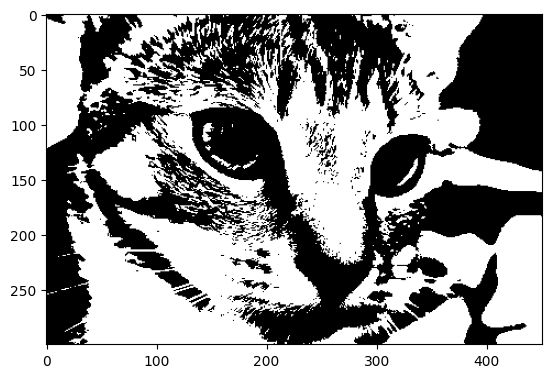

In [181]:
single_channel = image[:,:,0]
mask = single_channel > 150
plt.imshow(mask);

And now we can recover all the pixels that are "selected" by this mask:

In [182]:
single_channel[mask]

array([152, 152, 154, ..., 161, 161, 162], dtype=uint8)

## 4.6 Reshaping arrays

Often it is necessary to reshape arrays, i.e. keep elements unchanged but change their position. There are multiple functions that allow one to do this. The main one is of course ```reshape```.

### 4.6.1 ```reshape```

Given an array of $MxN$ elements, one can reshape it with a shape $OxP$ as long as $M*N = O*P$.

In [183]:
reshaped = np.reshape(normal_array,(2,6))
reshaped

array([[ 11.13913435,   8.21368618, 100.        ,  50.        ,
          6.89608385,  12.75670282],
       [  6.41298773,  10.80488503,   8.02096292,  23.        ,
          9.49776646,  12.92692533]])

In [184]:
reshaped.shape

(2, 6)

In [185]:
300*451/150

902.0

With the image as example, we can reshape the array from $300x451x3$ to $150x902x3$:

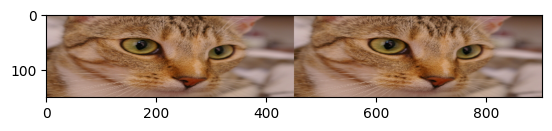

In [186]:
plt.imshow(np.reshape(image, (150,902,3)))

### 4.6.2 Flattening

It's also possible to simply flatten an array i.e. remove all dimensions to create a 1D array. This can be useful for example to create a histogram of a high-dimensional array.

In [187]:
flattened = np.ravel(normal_array)
flattened

array([ 11.13913435,   8.21368618, 100.        ,  50.        ,
         6.89608385,  12.75670282,   6.41298773,  10.80488503,
         8.02096292,  23.        ,   9.49776646,  12.92692533])

In [188]:
flattened.shape

(12,)

### 4.6.3 Dimension collapse

Another common way that leads to reshaping is projection. Let's consider again our ```normal_array```:

In [189]:
normal_array

array([[ 11.13913435,   8.21368618, 100.        ,  50.        ],
       [  6.89608385,  12.75670282,   6.41298773,  10.80488503],
       [  8.02096292,  23.        ,   9.49776646,  12.92692533]])

We can project all values along the first or second axis, to recover for each row/column the largest value:

In [190]:
proj0 = np.max(normal_array, axis = 0)
proj0

array([ 11.13913435,  23.        , 100.        ,  50.        ])

In [191]:
proj0.shape

(4,)

We see that our projected array has lost a dimension, the one along which we performed the projection. With the image, we could project all channels along the third dimension:

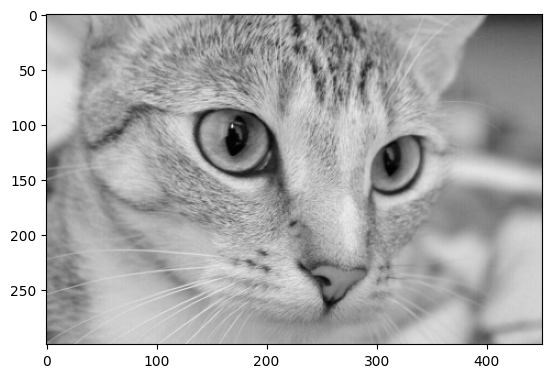

In [192]:
plt.imshow(image.max(axis=2));

### 4.6.4 Swaping dimensions

We can also simply exchange the position of dimensions. This can be achieved in different ways. For example we can ```np.roll``` dimensions, i.e. circularly shift dimensions. This conserves the relative oder of all axes:

In [193]:
array3D = np.ones((4, 10, 20))
array3D.shape

(4, 10, 20)

In [194]:
array_rolled = np.rollaxis(array3D, axis=1, start=0)
array_rolled.shape

(10, 4, 20)

Alternatively you can swap two axes. This doesn't preserver their relative positions: 

In [195]:
array_swapped = np.swapaxes(array3D, 0,2)
array_swapped.shape

(20, 10, 4)

With the image, we can for example swap the two first axes:

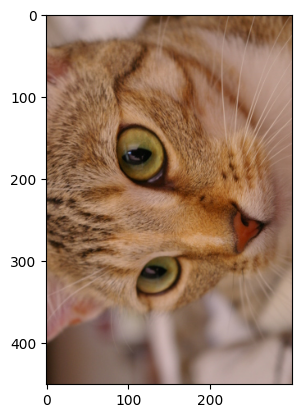

In [196]:
plt.imshow(np.swapaxes(image, 0, 1));

### 4.6.5 Change positions

Finally, we can also change the position of elements without changing the shape of the array. For example if we have an array with two columns, we can swap them:

In [197]:
array2D = np.random.normal(0,1,(4,2))
array2D

array([[ 0.76631524, -1.69137874],
       [ 0.65214351, -1.0507849 ],
       [ 0.13887851, -2.09105265],
       [ 0.14087834,  1.14663135]])

In [198]:
np.fliplr(array2D)

array([[-1.69137874,  0.76631524],
       [-1.0507849 ,  0.65214351],
       [-2.09105265,  0.13887851],
       [ 1.14663135,  0.14087834]])

Similarly, if we have two rows:

In [199]:
array2D = np.random.normal(0,1,(2,4))
array2D

array([[-0.05330325, -1.73479606,  1.3750882 , -1.31069838],
       [ 0.10661585,  0.24033808,  0.81397403,  0.12137303]])

In [200]:
np.flipud(array2D)

array([[ 0.10661585,  0.24033808,  0.81397403,  0.12137303],
       [-0.05330325, -1.73479606,  1.3750882 , -1.31069838]])

For more complex cases you can also use the more general ```np.flip()``` function.

With the image, flipping a dimension just mirrors the picture. To do that we select a single channel:

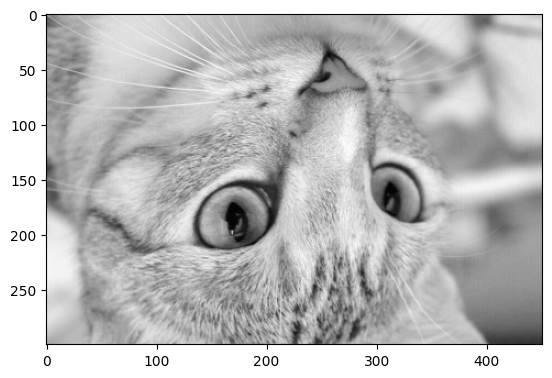

In [201]:
plt.imshow(np.flipud(image[:,:,0]));

# 5. Combining arrays

We have already seen how to create arrays and how to modify their dimensions. One last operation we can do is to combine multiple arrays. There are two ways to do that: by assembling arrays of same dimensions (concatenation, stacking etc.) or by combining arrays of different dimensions using *broadcasting*. Like in the previous chapter, we illustrate with small arrays and a real image.

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
plt.gray();
image = skimage.data.chelsea()

<Figure size 640x480 with 0 Axes>

## 5.1 Arrays of same dimensions

Let's start by creating a few two 2D arrays:

In [203]:
array1 = np.ones((10,5))
array2 = 2*np.ones((10,3))
array3 = 3*np.ones((10,5))

### 5.1.1 Concatenation

The first operation we can perform is concatenation, i.e. assembling the two 2D arrays into a larger 2D array. Of course we have to be careful with the size of each dimension. For example if we try to concatenate ```array1``` and ```array2``` along the first dimension, we get:

In [204]:
np.concatenate([array1, array2])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 5 and the array at index 1 has size 3

Both array have 10 lines, but one has 3 and the other 5 columns. We can therefore only concatenate them along the second dimensions:

In [205]:
array_conc = np.concatenate([array1, array2], axis = 1)

In [206]:
array_conc.shape

(10, 8)

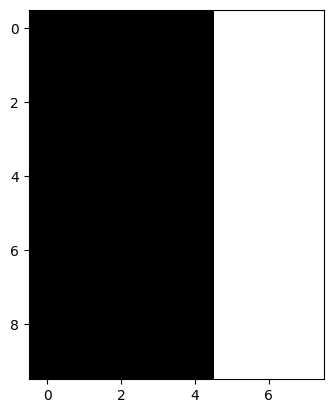

In [207]:
plt.imshow(array_conc, cmap = 'gray');

If we now use our example of real image, we can for example concatenate the two first channels of our RGB image:

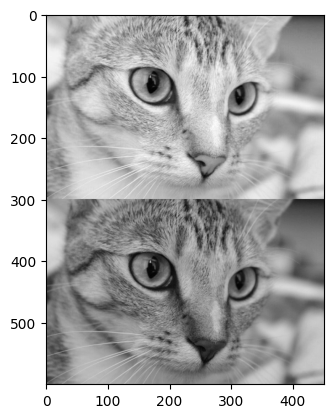

In [208]:
plt.imshow(np.concatenate([image[:,:,0], image[:,:,1]]));

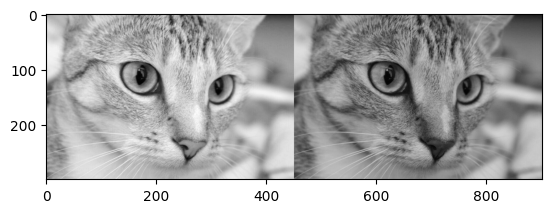

In [209]:
plt.imshow(np.concatenate([image[:,:,0], image[:,:,1]], axis=1));

### 5.1.2 Stacking

If we have several arrays with exact same sizes, we can also *stack* them, i.e. assemble them along a *new* dimension. For example we can create a 3D stack out of two 2D arrays:

In [210]:
array_stack = np.stack([array1, array3])

In [211]:
array_stack.shape

(2, 10, 5)

We can select the dimension along which to stack, again by using the ```axis``` keyword. For example if we want our new dimensions to be the *third* axis we can write:

In [212]:
array_stack = np.stack([array1, array3], axis = 2)

In [213]:
array_stack.shape

(10, 5, 2)

With our real image, we can for example stack the different channels in a new order (note that one could do that easily with ```np.swapaxis```):

In [214]:
image_stack = np.stack([image[:,:,2], image[:,:,0], image[:,:,1]], axis=2)

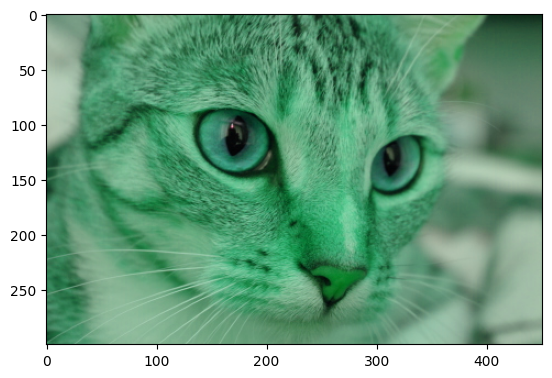

In [215]:
plt.imshow(image_stack);

As we placed the red channel, which has the highest intensity, at the position of the green one (second position) our image now is dominated by green tones.

## 5.2 Arrays of different dimensions

### 5.2.1 Broadcasting

Numpy has a powerful feature called **broadcasting**. This is the feature that for example allows you to write:

In [216]:
2 * array1

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

Here we just combined a single number with an array and Numpy *re-used* or *broadcasted* the element with less dimensions (the number 2) across the entire ```array1```. This does not only work with single numbers but also with arrays of different dimensions. Broadcasting can become very complex, so we limit ourselves here to a few common examples.

The general rule is that in an operation with arrays of different dimensions, **missing dimensions** or **dimensions of size 1** get *repeated* to create two arrays of same size. Note that comparisons of dimension size start from the **last** dimensions. For example if we have a 1D array and a 2D array:

In [217]:
array1D = np.arange(4)
array1D

array([0, 1, 2, 3])

In [218]:
array2D = np.ones((6,4))
array2D

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [219]:
array1D * array2D

array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.]])

Here ```array1D``` which has a *single line* got *broadcasted* over *each line* of the 2D array ```array2D```. Note the the size of each dimension is important. If ```array1D``` had for example more columns, that broadcasting could not work:

# Exercise

## 1. Array creation

- Create a 1D array called ```xarray``` with values from 0 to 10 and in steps of 0.1. Check the shape of the array:

- Create an array of normally distributed numbers with mean $\mu=0$ and standard deviation $\sigma=0.5$. It should have 20 rows and as many columns as there are elements in ```xarray```. Call it ```normal_array```:

- Check the type of ```normal_array```:

## 2. Array mathematics

- Using ```xarray``` as x-variable, create a new array ```yarray``` as y-variable using the function $y = 10* cos(x) * e^{-0.1x}$:

- Create ```array_abs``` by taking the absolute value of ```yarray```:

- Create a boolan array (logical array) where all positions $>0.3$ in ```array_abs``` are ```True``` and the others ```False```

- Create a standard deviation projection along the second dimension (columns) of ```normal_array```. Check that the dimensions are the ones you expected. Also are the values around the value you expect?

## 3. Plotting

- Use a line plot to plot ```yarray``` vs ```xarray```: